In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path

# Specify the directory path
directory = Path('../best_results/stellar')

method_accuracies = {}

# Iterate through each file in the directory
for item in directory.iterdir():
    # Check if the current item is a directory
    if item.is_dir():
        metric = pd.read_json(item / "test_metrics.json")
        method_accuracies[item.name] = [metric.iloc[-1]["accuracy"], metric.iloc[-1]["f1_score"]]
        

results = pd.DataFrame.from_dict(method_accuracies, orient="index", columns=["accuracy", "f1_score"])

In [6]:
# Specify the directory path
directory = Path('../best_results/xgboost')

# Iterate through each file in the directory
for item in directory.iterdir():
    # Check if the current item is a directory
    if item.is_dir():
        metric = pd.read_json(item / "test_metrics.json")
        method_accuracies[item.name] = [metric.iloc[-1]["accuracy"], metric.iloc[-1]["f1_score"]]
        



In [8]:
# Specify the directory path
directory = Path('../best_results/sklearn_mlp')

# Iterate through each file in the directory
for item in directory.iterdir():
    # Check if the current item is a directory
    if item.is_dir():
        metric = pd.read_json(item / "test_metrics.json")
        method_accuracies[item.name] = [metric.iloc[-1]["accuracy"], metric.iloc[-1]["f1_score"]]
    

In [17]:
# Specify the directory path
directory = Path('../best_results/torch_mlp')

# Iterate through each file in the directory
# for item in directory.iterdir():
metric = pd.read_json(directory / "test_metrics.json")
# print(metric)
method_accuracies["torch_mlp"] = [metric.iloc[-1]["accuracy"], metric.iloc[-1]["f1_score"]]

In [ ]:
# Specify the directory path
directory = Path('../best_results/sklearn_svm/svc')

# Iterate through each file in the directory
for item in directory.iterdir():
    # Check if the current item is a directory
    if item.is_dir():
        metric = pd.read_json(item / "test_metrics.json")
        method_accuracies[item.name] = [metric.iloc[-1]["accuracy"], metric.iloc[-1]["f1_score"]]
    

In [18]:
results = pd.DataFrame.from_dict(method_accuracies, orient="index", columns=["accuracy", "f1_score"])
results

,accuracy,f1_score
custom_2024-05-08_22-23-22_seed_42_folds_5,0.920090,0.826988
custom_neighbors_2024-05-09_00-31-10_seed_42_folds_5,0.939368,0.877987
custom_nodes_in_graph_2024-05-08_23-14-43_seed_42_folds_5,0.926619,0.851853
custom_random_nodes_2024-05-08_22-59-22_seed_42_folds_5,0.933581,0.851566
standard_time_2024-05-08_21-17-25_seed_42_folds_5,0.922354,0.837620
standard_xgboost,0.884137,0.736136
standard_mlp,0.934680,0.868032
linear_2024-05-08_20-33-44_seed_42_folds_5,0.882071,0.758301
config.yaml,0.925755,0.848219
torch_mlp,0.925755,0.848219


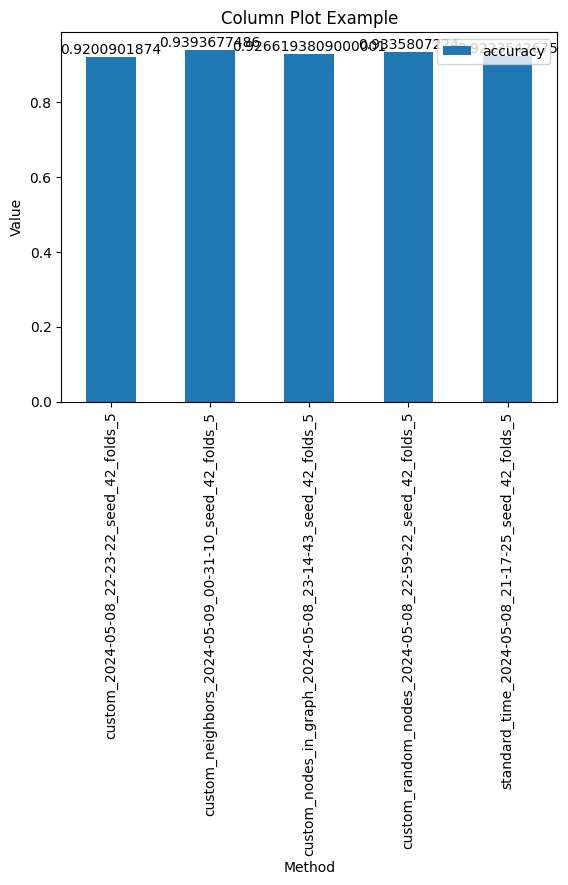

In [4]:
ax = results.plot(kind='bar', y="accuracy")
plt.title('Column Plot Example')

# Adding labels with values at the top of each column
for index, value in enumerate(results["accuracy"]):
    ax.text(index, value + 0.001, str(value), ha='center', va='bottom')

plt.xlabel('Method')
plt.ylabel('Value')
plt.show()

In [7]:
result_path = "..\\final_results\\xgboost\\standard_2024-05-08_20-50-46_seed_42_folds_5"

In [13]:
metrics = pd.read_json(result_path + "\\metrics.json")

In [29]:
metrics.iloc[-1]

f1_score_per_cell_type             [0.8664631771, 0.8567856208, 0.9088801046, 0.9...
f1_score                                                                    0.882305
accuracy                                                                    0.940741
average_precision_per_cell_type    [0.9448643799, 0.9479494375, 0.970156459, 0.98...
roc_auc_per_cell_type              [0.9991958165, 0.9988853438, 0.997590572, 0.99...
confusion_matrix                   [[883.8, 50.2, 1.8, 0.4, 3.6, 0.0, 5.6, 1.8, 1...
Name: 5, dtype: object